
# Projet du Module 7 Deep Learning (DL) : ***Classification avec des images réelles: dogs vs cats***


<center><img src="https://upload.wikimedia.org/wikipedia/commons/9/91/LogoEHTP.jpg" alt="drawing" width="400"/></center>

<p align="center">
  <img width="760" height="400" src="https://miro.medium.com/max/1838/1*oB3S5yHHhvougJkPXuc8og.gif">
</p>
** <center>MSDE-5</center>
* <center>Projet - Deep Learning</center>
** <center>Réalisé par : Marouane Hourmat Allah & Brahim Abbari</center>

#  Classification avec des images réelles: dogs vs cats


Le dataset complet provient d'une compétition Kaggle: https://www.kaggle.com/c/dogs-vs-cats

Le dataset en question contient 2 folders: dogs - cats

Soit un total de 2000 images.

L'objectif est de capitaliser sur les notions du cours pour développer un réseau CNN qui arrive à prédire avec la meilleure performance possible les images de chiens et de chats.

Ce notebook va permettre de structurer l'approche et la construction du modèle.

## 1- Importer des librairies pertinentes:

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2- Localiser le path où se trouvent toutes les images

In [3]:
# Define a variable as the directory path
my_data_dir = '/content/drive/MyDrive/Colab Notebooks/Python MSDE/data_cats_and_dogs'

### 2.1 - Vérifier que la commande ci-dessous retourne ['train', 'validation']

In [4]:
os.listdir(my_data_dir)

['train', 'validation']

### 2.2 - Définir les variables train_path et val_path:

In [5]:
# train and test paths (\ for windows, / for mac)
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/validation/'

### 2.3 - Print le nombre d'images pour chaque class (cats & dogs) dans le dossier train et validation:

In [6]:
# Vérifier le nombre d'images de chaque classe pour le train_path et val_path
print(len(os.listdir(train_path+'dogs')))
print(len(os.listdir(train_path+'cats')))
print(len(os.listdir(test_path+'dogs')))
print(len(os.listdir(test_path+'cats')))


# Vérifier que vous avez bien 2000 images au total !

1000
1000
500
500


## 3) Analyse d'exemples d'images dogs and cats

### 3.1 - Choisir au hasard une image de dog dans le train_path

In [7]:
dog_path = train_path+'/dogs'+'/dog.14.jpg'

### 3.2 - Transformer cette image en numpy array

In [8]:
dog_array = imread(dog_path)

### 3.3 - Vérifier les dimensions de cette image

In [9]:
dog_array.shape

(386, 500, 3)

### 3.4 -Plot cette image via 'imshow'

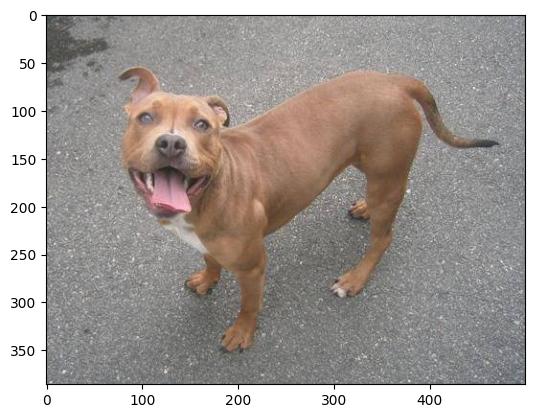

In [10]:
plt.imshow(dog_array)

### 3.5 - Refaire le même travail avec l'image d'un cat depuis le dossier train

In [11]:
cats_path = train_path+'/cats'+'/cat.12.jpg'

In [12]:
cats_array=imread(cats_path)

In [13]:
cats_array.shape

(224, 300, 3)

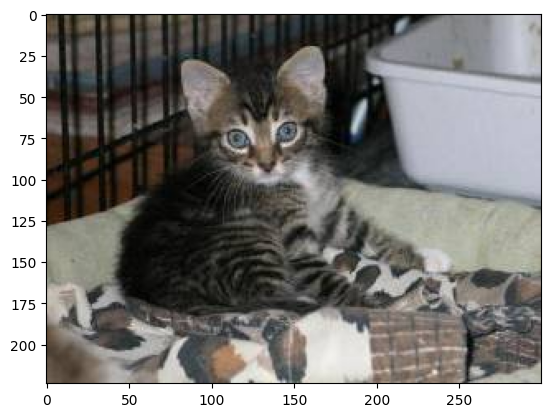

In [14]:
plt.imshow(cats_array)

In [15]:
# for loop to check all dimensions of images in a directory
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/cats'):

    img = imread(test_path+'/cats'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

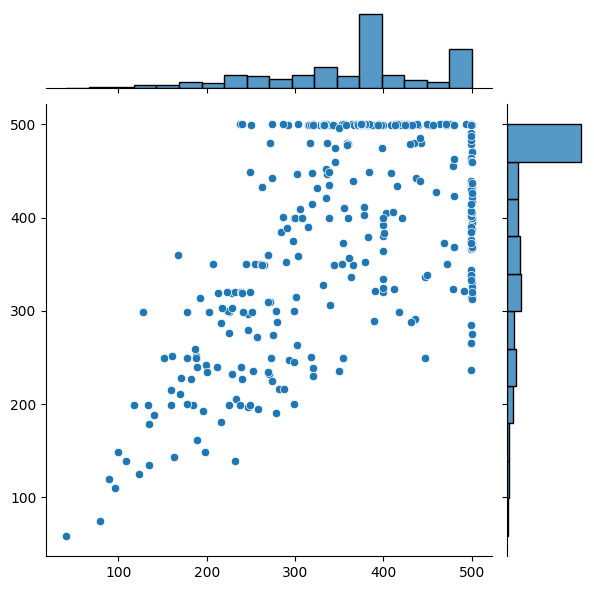

In [16]:
sns.jointplot(x = dim1,y = dim2)

In [17]:
print(np.mean(dim1))
print(np.mean(dim2))

357.926
411.862


In [18]:
image_shape=(220,250,3)


## 4) Créer un ImageDataGenerator qui effectue un retraitement "pertinent" de ces images:

In [19]:
# import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
'''
image_generator = ImageDataGenerator(rotation_range=90, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
'''

image_generator = ImageDataGenerator(1/255)

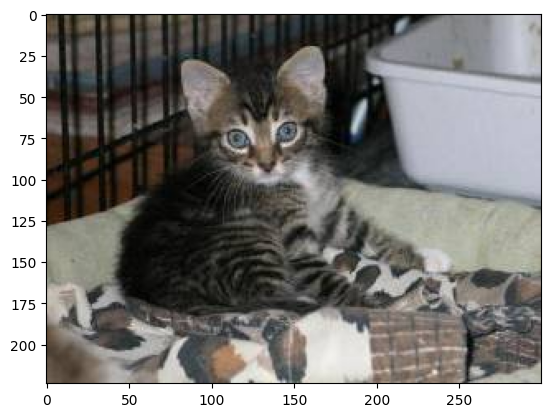

In [21]:
plt.imshow(cats_array)

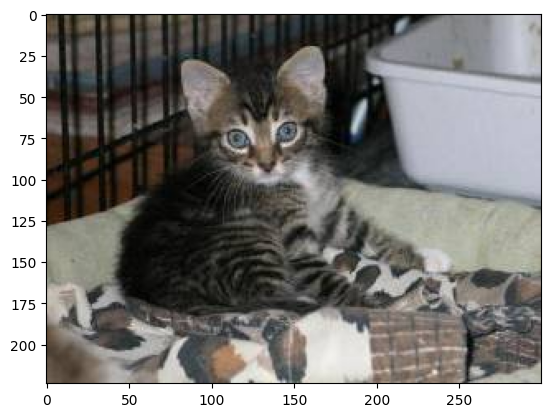

In [22]:
plt.imshow(image_generator.random_transform(cats_array))

## 5) Construire un modèle CNN from scratch pour la classification binaire de ces images:


**- Utiliser à minima les types layers suivants: Conv2D, MaxPooling2D, Dense.**

**- Utiliser également la technique du Dropout.**

**- Prendre un input_shape arbitraire fixe et approprié**

**- Print le model summary**

**- Ne pas hésiter à ajouter des techniques ou des méthodes sur les données ou le modèle pour améliorer la performance !**

**L'objectif est de maximiser l'accuracy sur les données de test**

In [23]:
image_generator.flow_from_directory(train_path)

Found 2000 images belonging to 2 classes.


In [24]:
image_generator.flow_from_directory(test_path)

Found 1000 images belonging to 2 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [26]:
# Create the CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau , CSVLogger

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(220, 250, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 248, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 218, 248, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 124, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 109, 124, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 122, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 107, 122, 64)      2

### 5.2 Créer une instance de EarlyStopping

In [27]:
# Create EarlyStopping instance
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### 5.3 Créer un generator pour le train et validation set:

In [28]:
# Create the train_image_generator
train_image_generator = image_generator.flow_from_directory(train_path,
                                               target_size=(220,250),
                                                color_mode='rgb',
                                               batch_size=64,
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [29]:
# Create the validation_image_generator
val_image_generator = image_generator.flow_from_directory(test_path,
                                               target_size=(220,250),
                                               color_mode='rgb',
                                               batch_size=64,
                                               class_mode='binary',shuffle=False)

Found 1000 images belonging to 2 classes.


In [30]:
# verify the classes dictionary (1 is dog or cat ?)
train_image_generator.class_indices

{'cats': 0, 'dogs': 1}

### 5.3 Entrainer le modèle à partir du train_image_generator et utiliser le EarlyStopping

In [31]:
# suivre à la fois la loss, accuracy, val_loss et val_accuracy
#traing the model
results = model.fit_generator(train_image_generator,epochs=20,
                              validation_data=val_image_generator,
                             callbacks=[early_stop])

<ipython-input-31-3770ef2c8c3a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_generator,epochs=20,
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20
32/32 [==============================] - 497s 15s/step - loss: 1.0671 - accuracy: 0.5765 - val_loss: 1.1123 - val_accuracy: 0.5270
Epoch 2/20
32/32 [==============================] - 14s 421ms/step - loss: 0.6158 - accuracy: 0.7000 - val_loss: 1.8119 - val_accuracy: 0.5100
Epoch 3/20
32/32 [==============================] - 15s 449ms/step - loss: 0.5753 - accuracy: 0.7220 - val_loss: 2.9059 - val_accuracy: 0.5640


## 8) Evaluation du modèle

### 8.1 Sauvegarder les losses dans un dataframe

In [32]:
scores = model.evaluate(val_image_generator)

16/16 [==============================] - 4s 263ms/step - loss: 2.9059 - accuracy: 0.5640


In [33]:
# Assuming 'results' contains the output of your model training
# Replace 'results' with the variable that contains your training history
# For example, results = model.fit(...) or results = model.fit_generator(...)
# Make sure to have access to the 'history' attribute if using fit_generator

# Extract relevant information from the training history
history = results.history
epochs = range(1, len(history['loss']) + 1)

# Create a DataFrame to store losses and accuracies
losses_df = pd.DataFrame({
    'epoch': epochs,
    'loss': history['loss'],
    'accuracy': history['accuracy'],
    'val_loss': history['val_loss'],
    'val_accuracy': history['val_accuracy']
})

# Save the DataFrame to a CSV file
losses_df.to_csv('training_losses.csv', index=False)


In [34]:
# save the losses in a dataframe
losses = pd.DataFrame(model.history.history)

In [35]:
print(losses_df)


   epoch      loss  accuracy  val_loss  val_accuracy
0      1  1.067071    0.5765  1.112306         0.527
1      2  0.615750    0.7000  1.811932         0.510
2      3  0.575331    0.7220  2.905923         0.564


### 8.2 Plot le training et validation loss

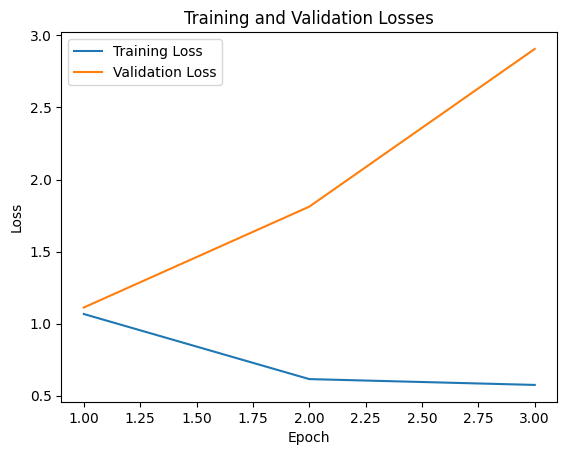

In [36]:
# plot the losses
import matplotlib.pyplot as plt


# Plot the training and validation losses
plt.plot(losses_df['epoch'], losses_df['loss'], label='Training Loss')
plt.plot(losses_df['epoch'], losses_df['val_loss'], label='Validation Loss')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Show the plot

### 8.3 Calculer les probabilités pour le validation image generator

In [37]:
 # compute the predictions on the test generator
print(model.metrics_names)
print(model.evaluate_generator(val_image_generator))
y_pred_proba = model.predict_generator(val_image_generator)


['loss', 'accuracy']


<ipython-input-37-459f822b7bda>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print(model.evaluate_generator(val_image_generator))
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


[2.9059228897094727, 0.5640000104904175]


<ipython-input-37-459f822b7bda>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_proba = model.predict_generator(val_image_generator)


### 8.4 Transformer ces probabilités en classes en prenant un threshold de 0.5

In [38]:
 # compute the classes associated to those probabilities
y_pred_class = y_pred_proba > 0.5

In [39]:
y_pred_class

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [

### 8.5 Récupérer le vecteur des true labels à partir du validation image generator

In [40]:
y_test = val_image_generator.classes

In [43]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.6 Afficher le classification report et la matrice de confusion

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


16/16 [==============================] - 4s 245ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


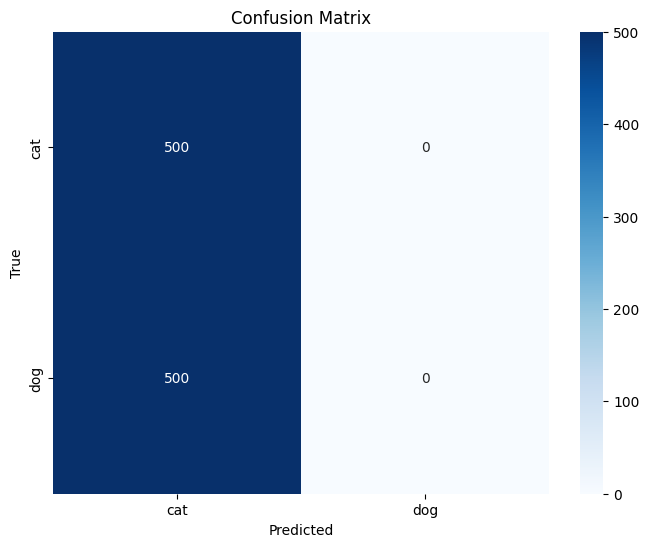

In [46]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


# Get true labels from the generator
true_labels = val_image_generator.classes

# Generate predictions using the model
predictions = model.predict(val_image_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Now you can use true_labels and predicted_labels to calculate metrics

# Calculate and display the classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### 8.7 KPI final: quel est l'accuracy du model sur les données de test ? Etes-vous satisfaits de la performance de votre modèle ?

In [53]:
# Chargement des images de test (si elles ne sont pas déjà chargées)
test_datagen = ImageDataGenerator(rescale=1./255)

# Générateur d'images pour les données de test
test_generator = test_datagen.flow_from_directory(
    test_path,                # Chemin vers le dossier de test
    target_size=(220, 250),    # Redimensionner toutes les images à la même taille
    batch_size=32,             # Taille du lot (batch)
    class_mode='binary'        # Mode de classification binaire (chien ou chat)
)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator)

# Affichage de l'accuracy sur les données de test
print("Accuracy sur les données de test :", test_accuracy)


Found 1000 images belonging to 2 classes.
32/32 [==============================] - 4s 114ms/step - loss: 22.8400 - accuracy: 0.5000
Accuracy sur les données de test : 0.5


# 9) Prédictions sur des cas particuliers

### 9.1 Afficher quelques images des données de test où le modèle s'est trompé.

###  Pour afficher quelques images des données de test où le modèle s'est trompé, Nous avons décider d'utilser les prédictions du modèle et les comparer aux vraies étiquettes

32/32 [==============================] - 6s 168ms/step


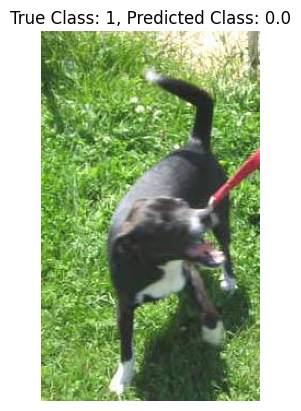

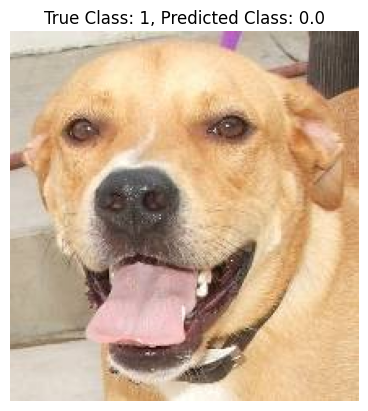

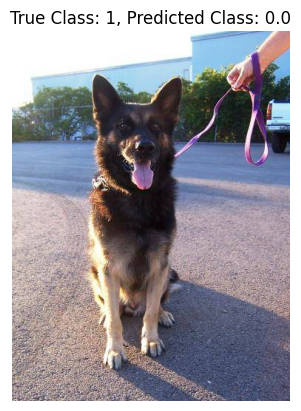

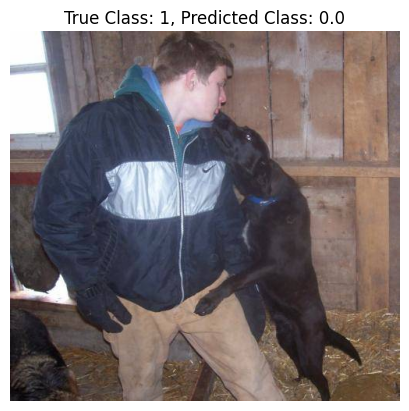

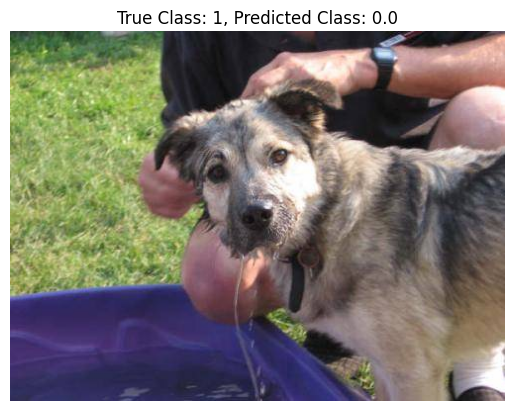

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Prédictions du modèle sur les données de test
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).flatten()  # Arrondir les prédictions à la classe binaire (0 ou 1)

# Vraies classes des données de test
true_classes = test_generator.classes

# Indices des images où le modèle s'est trompé
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Afficher quelques images où le modèle s'est trompé
num_images_to_display = 5
for i in range(min(num_images_to_display, len(misclassified_indices))):
    index = misclassified_indices[i]
    img_path = test_generator.filepaths[index]
    img = plt.imread(img_path)

    plt.imshow(img)
    plt.title(f"True Class: {true_classes[index]}, Predicted Class: {predicted_classes[index]}")
    plt.axis('off')
    plt.show()


### 9.2 Ces images ont-elles des patterns en commun ?

L'approche de la visualisation des erreurs est cruciale pour comprendre les lacunes de performance d'un modèle de classification. En examinant attentivement les images mal classées, on peut identifier des patterns récurrents ou des caractéristiques spécifiques qui pourraient être responsables de ces erreurs. Par exemple, dans un modèle de classification d'images d'animaux, on pourrait constater que les erreurs surviennent fréquemment lorsque les animaux sont partiellement cachés par des objets, tels que des arbres ou des rochers. Cette observation suggère que le modèle pourrait avoir du mal à généraliser lorsque les sujets sont partiellement dissimulés. De plus, en visualisant les erreurs, on peut repérer des situations où le modèle confond des classes similaires, comme des races de chiens ou de chats. Cette information est précieuse pour ajuster le modèle, par exemple en augmentant la diversité des images d'entraînement ou en incorporant des techniques spécifiques pour traiter les scénarios complexes. En résumé, la visualisation des erreurs offre un aperçu approfondi des faiblesses du modèle, guidant ainsi le processus d'amélioration et d'optimisation pour une performance de classification plus robuste.

# 10) Data augmentation (optionnel)

Utiliser des techniques de Data augmentation. L'objectif est d'enrichir le training set à partir des images initiales afin d'améliorer la performance du modèle.

Votre accuracy s'améliore t-elle post votre data augmentation ?

Vous êtes libre de structurer cette partie comme vous le jugez pertinent.

In [58]:
from keras.preprocessing.image import ImageDataGenerator

# Créer un générateur d'images avec Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,         # Mise à l'échelle des pixels entre 0 et 1
    rotation_range=20,      # Rotation aléatoire de l'image dans une plage de 20 degrés
    width_shift_range=0.2,  # Décalage horizontal aléatoire
    height_shift_range=0.2, # Décalage vertical aléatoire
    shear_range=0.2,        # Déformation de cisaillement aléatoire
    zoom_range=0.2,         # Zoom aléatoire
    horizontal_flip=True,   # Retournement horizontal aléatoire
    fill_mode='nearest'     # Mode de remplissage pour les transformations
)



# Charger les données d'entraînement
batch_size = 32

# Créer un générateur d'images à partir du répertoire
train_generator = datagen.flow_from_directory(
    my_data_dir,
    target_size=(220, 250),  # Spécifiez vos dimensions d'image
    batch_size=batch_size,
    class_mode='binary'  # Ou 'categorical' pour une classification multiclasse
)

# Entraîner le modèle avec les données augmentées
model.fit(train_generator, epochs=20)


Found 3000 images belonging to 2 classes.
Epoch 1/20
94/94 [==============================] - 60s 625ms/step - loss: 0.7893 - accuracy: 0.5810
Epoch 2/20
94/94 [==============================] - 56s 596ms/step - loss: 0.7365 - accuracy: 0.6087
Epoch 3/20
94/94 [==============================] - 59s 624ms/step - loss: 0.6998 - accuracy: 0.6133
Epoch 4/20
94/94 [==============================] - 55s 587ms/step - loss: 0.6848 - accuracy: 0.6210
Epoch 5/20
94/94 [==============================] - 55s 582ms/step - loss: 0.6717 - accuracy: 0.6400
Epoch 6/20
94/94 [==============================] - 57s 601ms/step - loss: 0.6695 - accuracy: 0.6290
Epoch 7/20
94/94 [==============================] - 55s 580ms/step - loss: 0.6631 - accuracy: 0.6447
Epoch 8/20
94/94 [==============================] - 54s 577ms/step - loss: 0.6602 - accuracy: 0.6493
Epoch 9/20
94/94 [==============================] - 56s 597ms/step - loss: 0.6583 - accuracy: 0.6410
Epoch 10/20
94/94 [==============================

# 11) Transfer learning

Utiliser la technique de transfer learning à partir d'un modèle open source qui vous semble pertinent. Justifier le choix du modèle ?

Au final, votre accuracy s'est elle améliorée significativement ?

Vous êtes libre de structurer cette partie comme vous le jugez pertinent.

In [59]:
import tensorflow as tf

In [60]:
from tensorflow import keras

# Working with directory library
from os import path, listdir
from os.path import isdir

# Image visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [61]:
# Define function to load image from path, return all image paths and labels.

def load_image_dataset(my_data_dir):
    all_image_dirs = [path.join(my_data_dir, f) for f in listdir(my_data_dir) if not isdir(path.join(my_data_dir, f))]
    all_image_labels = []
    for f in all_image_dirs:
        if f.split('.')[0][-3:] == 'cat':
            all_image_labels.append(0)
        else:
            all_image_labels.append(1)
    return all_image_dirs, all_image_labels

In [62]:
from os import listdir, path

def load_image_dataset(my_data_dir):
    all_image_dirs = []
    all_image_labels = []

    for split_dir in ['train', 'validation']:
        for label, label_name in enumerate(['cats', 'dogs']):
            label_dir = path.join(my_data_dir, split_dir, label_name)
            image_files = [path.join(label_dir, f) for f in listdir(label_dir) if not path.isdir(path.join(label_dir, f))]

            all_image_dirs.extend(image_files)
            all_image_labels.extend([label] * len(image_files))

    return all_image_dirs, all_image_labels


In [63]:
# Load and save image paths and labels

my_data_dir = '/content/drive/MyDrive/Colab Notebooks/Python MSDE/data_cats_and_dogs'  # Replace this with the actual path to your dataset
all_image_dirs, all_image_labels = load_image_dataset(my_data_dir)


In [64]:
# Function that take care of preprocessing image

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0,1] range
    image = 2*image-1  # normalize to [-1,1] range
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

In [65]:
# Split data to train and test set.

num_train_image = int(len(all_image_labels)*0.8//1)
train_image_dirs, train_label = all_image_dirs[:num_train_image], all_image_labels[:num_train_image]
test_image_dirs, test_label = all_image_dirs[num_train_image:], all_image_labels[num_train_image:]

In [66]:
# Put the image's paths and labels of train and test set to tensorflow dataset.

train_path_label = tf.data.Dataset.from_tensor_slices((train_image_dirs, train_label))
test_path_label = tf.data.Dataset.from_tensor_slices((test_image_dirs, test_label))

In [67]:
# Load and preprocess all the images, put it in the same place with their labels.

train_image_label_ds = train_path_label.map(load_and_preprocess_from_path_label)
test_image_label_ds = test_path_label.map(load_and_preprocess_from_path_label).batch(1)

In [68]:
# implement batch for train set.

BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_image_label_ds.shuffle(buffer_size = len(all_image_labels))
train_ds = train_ds.repeat()
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [69]:
# Create an instance of MobileNetV2 as pre-trained model.

mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [70]:
# Build the CNN-model

cnn_model = keras.models.Sequential([
    mobile_net,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [71]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_192 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                81984     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2340098 (8.93 MB)
Trainable params: 8211

In [72]:
# Compile CNN-model

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [73]:
# Training the model with the train_ds above.

steps_per_epoch=tf.math.ceil(len(all_image_dirs)/BATCH_SIZE).numpy()
cnn_model.fit(train_ds, epochs=2, steps_per_epoch=steps_per_epoch, validation_data=test_image_label_ds)

Epoch 1/2
94/94 [==============================] - 30s 199ms/step - loss: 0.0912 - accuracy: 0.9628 - val_loss: 0.0865 - val_accuracy: 0.9733
Epoch 2/2
94/94 [==============================] - 13s 144ms/step - loss: 0.0163 - accuracy: 0.9953 - val_loss: 0.0426 - val_accuracy: 0.9883


# 12) Déploiement

À partir du modèle définitif que vous aurez construit et sauvegardé sur Keras, vous devez créer une webapp où l'utilisateur peut se connecter à l'URL, charger une image de chien ou chat et obtenir en retour la prédiction du modèle.

Stack recommandé: streamlit pour le développement de la webapp & render pour le hosting

In [74]:
# save model for flask usage.

cnn_model.save('dog_cat_M.h5')

# Fin du projet!

Au final, vous devez remettre à l'équipe pédagogique:

### 1 - Ce notebook rempli avec les outputs visibles
### 2 - Le lien URL de votre application web